In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
asia = pd.read_csv('/workspaces/World-Universities-Ranking-2022/data/raw/Asia%20top%20100%20Universities.csv')
asia.head()

,name,world_ranking,asia_ranking,contry_ranking,country,city,type,acceptance_rat,publication,high_degree,web,language,Unnamed: 12,Unnamed: 13
0,Ankara University,"#581 / 14,131","#95 / 5,830",#3 / 175,Turkey,Ankara,Non-profit,43%,"23,329",Doctorate,www.ankara.edu.tr,Turkish;English,+90 (312) 212 6040,"Rektörlügü, Dögol Caddesi, Tandogan\n Ankara, ..."
1,Bar-Ilan University,"#480 / 14,131","#71 / 5,830",#6 / 36,Israel,Ramat Gan,Non-profit,49%,"31,391",Bachelor,www.biu.ac.il,Hebrew;English,+972 (3) 5318 111,"Ramat Gan, Tel Aviv District, 52100 \nIsrael"
2,Beihang University,"#412 / 14,131","#56 / 5,830",#29 / 960,China,Beijing,Non-profit,44%,"67,291",Bachelor,buaa.edu.cn,Chinese;English,+86 (10) 8231 7685,"37 Xueyuan Road, Haidian District\n Beijing, B..."
3,Beijing Institute of Technology,"#472 / 14,131","#68 / 5,830",#34 / 960,China,Beijing,Non-profit,38%,"58,229",Doctorate,bit.edu.cn,Chinese;English,+86 (10) 6891 1438,"5 Zhongguancun South Street, Haidian District\..."
4,Beijing Normal University,"#336 / 14,131","#43 / 5,830",#21 / 960,China,Beijing,Non-profit,43%,"50,080",Bachelor,www.bnu.edu.cn,Chinese;English,NaN,"19 Xinwai Dajie\n Beijing, Beijing, 100875 \nC..."


In [3]:
# Dropping unneeded columns

col_to_drop = ['web','Unnamed: 12','Unnamed: 13']

asia = asia.drop(col_to_drop, axis=1)

asia.head()

,name,world_ranking,asia_ranking,contry_ranking,country,city,type,acceptance_rat,publication,high_degree,language
0,Ankara University,"#581 / 14,131","#95 / 5,830",#3 / 175,Turkey,Ankara,Non-profit,43%,"23,329",Doctorate,Turkish;English
1,Bar-Ilan University,"#480 / 14,131","#71 / 5,830",#6 / 36,Israel,Ramat Gan,Non-profit,49%,"31,391",Bachelor,Hebrew;English
2,Beihang University,"#412 / 14,131","#56 / 5,830",#29 / 960,China,Beijing,Non-profit,44%,"67,291",Bachelor,Chinese;English
3,Beijing Institute of Technology,"#472 / 14,131","#68 / 5,830",#34 / 960,China,Beijing,Non-profit,38%,"58,229",Doctorate,Chinese;English
4,Beijing Normal University,"#336 / 14,131","#43 / 5,830",#21 / 960,China,Beijing,Non-profit,43%,"50,080",Bachelor,Chinese;English


In [4]:
# Renaming columns

mapper = {
    'acceptance_rat':'acceptance_rate',
    'contry_ranking':'country_ranking'}

asia = asia.rename(columns=mapper)

In [5]:
asia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             100 non-null    object
 1   world_ranking    100 non-null    object
 2   asia_ranking     100 non-null    object
 3   country_ranking  100 non-null    object
 4   country          100 non-null    object
 5   city             100 non-null    object
 6   type             95 non-null     object
 7   acceptance_rate  100 non-null    object
 8   publication      100 non-null    object
 9   high_degree      98 non-null     object
 10  language         98 non-null     object
dtypes: object(11)
memory usage: 8.7+ KB


In [6]:
# Stripping unnecessary characters

# Percent sign from acceptance_rate
asia['acceptance_rate'] = asia['acceptance_rate'].str.rstrip('%')
asia['acceptance_rate'] = asia['acceptance_rate'].astype('float') * 0.01

# Number sign from ranking columns
cols_to_strip = ['world_ranking','asia_ranking','country_ranking']
asia[cols_to_strip] = asia[cols_to_strip].apply(lambda x: x.str.replace('#',''))

asia.head()

,name,world_ranking,asia_ranking,country_ranking,country,city,type,acceptance_rate,publication,high_degree,language
0,Ankara University,"581 / 14,131","95 / 5,830",3 / 175,Turkey,Ankara,Non-profit,0.43,"23,329",Doctorate,Turkish;English
1,Bar-Ilan University,"480 / 14,131","71 / 5,830",6 / 36,Israel,Ramat Gan,Non-profit,0.49,"31,391",Bachelor,Hebrew;English
2,Beihang University,"412 / 14,131","56 / 5,830",29 / 960,China,Beijing,Non-profit,0.44,"67,291",Bachelor,Chinese;English
3,Beijing Institute of Technology,"472 / 14,131","68 / 5,830",34 / 960,China,Beijing,Non-profit,0.38,"58,229",Doctorate,Chinese;English
4,Beijing Normal University,"336 / 14,131","43 / 5,830",21 / 960,China,Beijing,Non-profit,0.43,"50,080",Bachelor,Chinese;English


In [7]:
asia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             100 non-null    object 
 1   world_ranking    100 non-null    object 
 2   asia_ranking     100 non-null    object 
 3   country_ranking  100 non-null    object 
 4   country          100 non-null    object 
 5   city             100 non-null    object 
 6   type             95 non-null     object 
 7   acceptance_rate  100 non-null    float64
 8   publication      100 non-null    object 
 9   high_degree      98 non-null     object 
 10  language         98 non-null     object 
dtypes: float64(1), object(10)
memory usage: 8.7+ KB


In [8]:
asia['acceptance_rate'].head()

0    0.43
1    0.49
2    0.44
3    0.38
4    0.43
Name: acceptance_rate, dtype: float64

In [9]:
asia['type'].value_counts()

type
Non-profit    92
For-profit     3
Name: count, dtype: int64

In [10]:
asia[asia['type'].isna()]

,name,world_ranking,asia_ranking,country_ranking,country,city,type,acceptance_rate,publication,high_degree,language
37,Keio University,"162 / 14,131","16 / 5,830",5 / 719,Japan,Tokyo,NaN,0.24,"65,910",Bachelor,Japanese;English
40,Korea University,"368 / 14,131","48 / 5,830",3 / 193,South Korea,Seoul,NaN,0.18,"72,616",Bachelor,Korean and English
55,Nihon University,"423 / 14,131","57 / 5,830",14 / 719,Japan,Tokyo,NaN,0.35,"33,461",Bachelor,Japanese
71,Sungkyunkwan University,"429 / 14,131","58 / 5,830",5 / 193,South Korea,Seoul,NaN,0.17,"49,162",Bachelor,Korean
92,Waseda University,"284 / 14,131","32 / 5,830",11 / 719,Japan,Tokyo,NaN,0.17,"44,145",Bachelor,Japanese;English


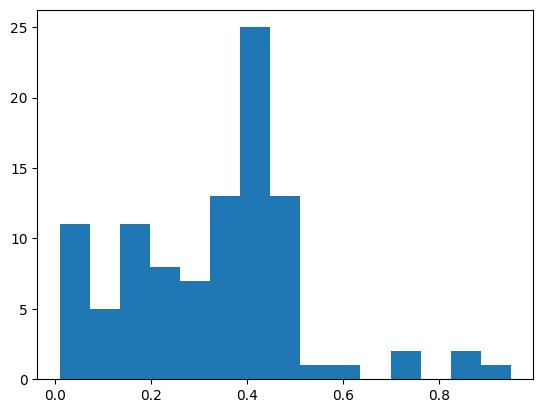

In [11]:
plt.hist(asia['acceptance_rate'], bins=15)
plt.show()